In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import calendar

In [57]:
train = pd.read_csv("/Users/ghostpc/Downloads/train_wn75k28.csv", encoding='ISO-8859-1')
test = pd.read_csv("/Users/ghostpc/Downloads/test_Wf7sxXF.csv", encoding='ISO-8859-1')
submission = pd.read_csv("/Users/ghostpc/Downloads/sample_submission_2zvVjBu.csv", encoding='ISO-8859-1')

In [58]:
# coverting object to date time 
train['created_at'] = pd.to_datetime(train['created_at'])
train['signup_date'] = pd.to_datetime(train['signup_date'])

In [59]:
test['created_at'] = pd.to_datetime(test['created_at'])
test['signup_date'] = pd.to_datetime(test['signup_date'])

In [60]:
train['dayscount']=train['created_at']-train['signup_date']
train['dayscount']

0         99 days
1        104 days
2       -222 days
3       1185 days
4        207 days
           ...   
39156   1534 days
39157         NaT
39158         NaT
39159         NaT
39160    873 days
Name: dayscount, Length: 39161, dtype: timedelta64[ns]

In [61]:
test['dayscount']=test['created_at']-test['signup_date']
test['dayscount']

0       137 days
1       590 days
2            NaT
3       558 days
4       297 days
          ...   
13179        NaT
13180    11 days
13181   227 days
13182        NaT
13183        NaT
Name: dayscount, Length: 13184, dtype: timedelta64[ns]

In [62]:
train['dayscount'] = train['dayscount'].fillna(train['dayscount'].mean())
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dayscount                   0
dtype: int64

In [63]:
test['dayscount'] = test['dayscount'].fillna(test['dayscount'].mean())
test.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dayscount                  0
dtype: int64

In [64]:
#dayscount dt to int
train['dayscount']=train['dayscount'].dt.days

In [65]:
test['dayscount']=test['dayscount'].dt.days

In [66]:
train['products_purchased'] = train['products_purchased'].fillna(train['products_purchased'].median())

In [67]:
test['products_purchased'] = test['products_purchased'].fillna(train['products_purchased'].median())

In [69]:
train['created_at_day'] = train['created_at'].dt.day_name()

In [72]:
train['signup_date_day'] = train['signup_date'].dt.day_name()

In [73]:
train['signup_date_day'] = train['signup_date_day'].fillna(train['signup_date_day'].mode())

In [74]:
test['created_at_day'] = test['created_at'].dt.day_name()

In [75]:
test['signup_date_day'] = test['signup_date'].dt.day_name()

In [76]:
test['signup_date_day'] = test['signup_date_day'].fillna(test['signup_date_day'].mode())

In [78]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [80]:
X = train.drop(['id','buy','created_at','signup_date'],axis=1)

In [81]:
y = train['buy']

In [82]:
testt=test.drop(['id','created_at','signup_date'],axis=1)

In [83]:
testt.isnull().sum()

campaign_var_1               0
campaign_var_2               0
products_purchased           0
user_activity_var_1          0
user_activity_var_2          0
user_activity_var_3          0
user_activity_var_4          0
user_activity_var_5          0
user_activity_var_6          0
user_activity_var_7          0
user_activity_var_8          0
user_activity_var_9          0
user_activity_var_10         0
user_activity_var_11         0
user_activity_var_12         0
dayscount                    0
created_at_day_Friday        0
created_at_day_Monday        0
created_at_day_Saturday      0
created_at_day_Sunday        0
created_at_day_Thursday      0
created_at_day_Tuesday       0
created_at_day_Wednesday     0
signup_date_day_Friday       0
signup_date_day_Monday       0
signup_date_day_Saturday     0
signup_date_day_Sunday       0
signup_date_day_Thursday     0
signup_date_day_Tuesday      0
signup_date_day_Wednesday    0
dtype: int64

In [84]:
X.isnull().sum()

campaign_var_1               0
campaign_var_2               0
products_purchased           0
user_activity_var_1          0
user_activity_var_2          0
user_activity_var_3          0
user_activity_var_4          0
user_activity_var_5          0
user_activity_var_6          0
user_activity_var_7          0
user_activity_var_8          0
user_activity_var_9          0
user_activity_var_10         0
user_activity_var_11         0
user_activity_var_12         0
dayscount                    0
created_at_day_Friday        0
created_at_day_Monday        0
created_at_day_Saturday      0
created_at_day_Sunday        0
created_at_day_Thursday      0
created_at_day_Tuesday       0
created_at_day_Wednesday     0
signup_date_day_Friday       0
signup_date_day_Monday       0
signup_date_day_Saturday     0
signup_date_day_Sunday       0
signup_date_day_Thursday     0
signup_date_day_Tuesday      0
signup_date_day_Wednesday    0
dtype: int64

# oversampling

In [85]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [86]:
# define oversampling strategy
UnderSampler = RandomUnderSampler(sampling_strategy=.9)

In [20]:
X, y = UnderSampler.fit_resample(X, y)

In [21]:
print(Counter(y))

Counter({0: 2220, 1: 1998})


# Logestic Model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ghostpc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [66]:
y_pred_sol = logreg.predict(testt)

In [25]:
submission['buy']=y_pred_sol

In [26]:
#submission.to_csv('LRModel3.csv',index=False)

# xgboost

In [88]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [89]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [90]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [91]:
classifier=xgboost.XGBClassifier()

In [92]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [93]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 1 minutes and 20.7 seconds.


In [95]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [96]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [97]:

from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.9745510256192016

In [108]:
xgb_cl.feature_importances_

array([0.00732984, 0.0078331 , 0.00488837, 0.00762006, 0.14674197,
       0.00422897, 0.16908598, 0.0331263 , 0.00624411, 0.00523784,
       0.03208856, 0.32595748, 0.01322894, 0.14045276, 0.00934405,
       0.02075289, 0.00361972, 0.00384989, 0.00375551, 0.00341975,
       0.00305556, 0.00311609, 0.0030939 , 0.00693778, 0.0045064 ,
       0.00800329, 0.00361583, 0.00716724, 0.00592697, 0.00577086],
      dtype=float32)

In [109]:
sorted_idx = xgb_cl.feature_importances_.argsort()

<BarContainer object of 30 artists>

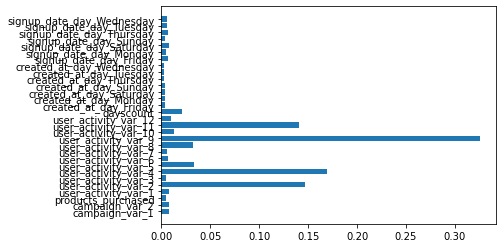

In [110]:
plt.barh(X_train.columns, xgb_cl.feature_importances_) 

In [98]:
preds = xgb_cl.predict(testt)

In [99]:
submission['buy']=preds

In [100]:
submission.to_csv('XGModel8.csv',index=False)

# StratifiedKFold

In [101]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing

In [102]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [103]:
# Init classifier
xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [104]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

In [105]:
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    xgb_cl.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(xgb_cl.score(x_test_fold, y_test_fold))

In [106]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9785550165943324, 0.9742083758937692, 0.9744637385086823, 0.9731869254341164, 0.9770173646578141, 0.9770173646578141, 0.9729315628192032, 0.9747191011235955, 0.9785495403472931, 0.9724208375893769]

Maximum Accuracy That can be obtained from this model is: 97.85550165943324 %

Minimum Accuracy: 97.2420837589377 %

Overall Accuracy: 97.53069827625997 %

Standard Deviation is: 0.002300855290418724
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=3;, score=0.936 total time=  28.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.920 total time=   7.2s
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.955 total time=   7.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=7;, score=0.942 total time=   6.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, l